In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import load_model
from IPython.display import Image
%matplotlib inline

Importando o DataFrame

In [7]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

Classes de roupas e acessórios

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
X_test.shape

(10000, 28, 28)

Normalização dos dados

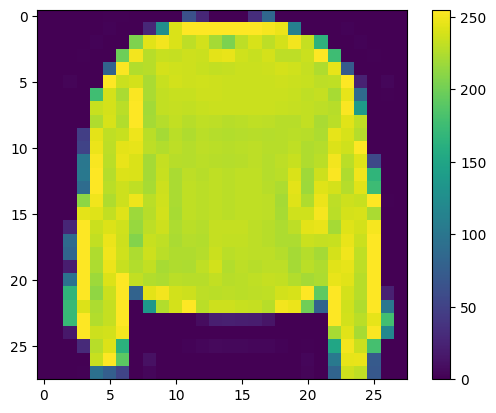

In [15]:
plt.figure()
plt.imshow(X_train[7])
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
#Normalização dos dados entre 0 e 1
X_train = X_train / 255.0
X_test = X_test / 255.0

Modelo

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
model.fit(X_train, y_train, epochs=10)
model.save('final_model.h5')

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2678 - accuracy: 0.9002
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2610 - accuracy: 0.9035
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2566 - accuracy: 0.9044
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2502 - accuracy: 0.9075
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2440 - accuracy: 0.9087
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2414 - accuracy: 0.9105
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2361 - accuracy: 0.9123
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2320 - accuracy: 0.9135
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2272 - accuracy: 0.9161
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.22

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Predições

In [21]:
pred = model.predict(X_test)
pred[0]

313/313 [==============================] - 1s 3ms/step


array([1.7665616e-05, 5.0799052e-08, 2.9979148e-07, 1.3287864e-05,
       6.4556389e-06, 5.7046227e-03, 3.2921103e-05, 5.2351527e-02,
       2.6338728e-04, 9.4160980e-01], dtype=float32)

In [22]:
np.argmax(pred[19])

0

In [23]:
y_test[19]

0

In [25]:
def load_image(filename):
  img = load_img(filename, color_mode="grayscale", target_size=(28,28))
  img = img_to_array(img)
  img = img.reshape(1,28,28,1)
  img = img.astype('float32')
  img = img /255.0
  return img

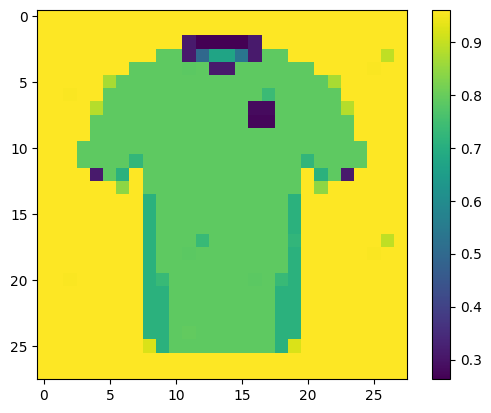

In [32]:
newImg = load_image('/content/drive/MyDrive/Curso de Machine Learning/new2.png')
newImg2 = newImg.reshape(28,28)
plt.figure()
plt.imshow(newImg2)
plt.colorbar()
plt.grid(False)
plt.show()

In [33]:
pred = model.predict(newImg)
pred

1/1 [==============================] - 0s 22ms/step


array([[1.36397201e-13, 1.06853006e-08, 7.57267224e-18, 9.12043361e-16,
        5.79439554e-19, 1.01159065e-23, 2.18081976e-12, 7.27935537e-23,
        1.00000000e+00, 3.40589890e-09]], dtype=float32)

In [34]:
np.argmax(pred)


8

In [35]:
class_names[8]

'Bag'